# Image Dimensionality Reduction

# Imports

In [97]:
%pip install tensorflow==2.16.1 --quiet

In [98]:
import tensorflow as tf
import numpy as np
import matplotlib

In [99]:
tf.__version__, np.__version__, matplotlib.__version__

('2.16.1', '1.26.4', '3.8.0')

In [100]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

# Database

In [101]:
(x_train, _), (x_test, _) =  mnist.load_data()
x_train.shape, x_test.shape, x_train.min(), x_train.max()

((60000, 28, 28), (10000, 28, 28), 0, 255)

In [102]:
x_train, x_test = x_train / x_train[0].max(), x_test / x_test[0].max()
x_train.shape, x_test.shape, x_train[0].max(), x_train[0].min()

((60000, 28, 28), (10000, 28, 28), 1.0, 0.0)

# Preprocessing

In [103]:
x_train_flatten = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2])
x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

In [104]:
x_train_conv = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
x_test_conv = x_test.reshape(-1, x_test.shape[1], x_test.shape[2], 1)
x_train_conv.shape, x_test_conv.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Building and Training the Model

In [105]:
autoencoder = Sequential()
autoencoder.add(Input(shape=(x_train_flatten.shape[1],)))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(x_train_flatten.shape[1], activation='sigmoid'))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,616 (787.56 KB)

 Trainable params: 201,616 (787.56 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
img_flatten = Input(shape=(x_train_flatten.shape[1],))
encoder = Model(img_flatten, autoencoder.layers[0](img_flatten))
encoder.summary()

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │         100,480 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,480 (392.50 KB)

 Trainable params: 100,480 (392.50 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
img_encoded = Input(shape=(128,))
decoder = Model(img_encoded, autoencoder.layers[-1](img_encoded))
decoder.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,136 (395.06 KB)

 Trainable params: 101,136 (395.06 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=50, batch_size = 256, validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0086 - loss: 0.3114 - val_accuracy: 0.0088 - val_loss: 0.1342
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0105 - loss: 0.1256 - val_accuracy: 0.0114 - val_loss: 0.1028
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0125 - loss: 0.0998 - val_accuracy: 0.0122 - val_loss: 0.0891
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0132 - loss: 0.0878 - val_accuracy: 0.0126 - val_loss: 0.0817
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0131 - loss: 0.0812 - val_accuracy: 0.0114 - val_loss: 0.0770
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0131 - loss: 0.0769 - val_accuracy: 0.0140 - val_loss: 0.0742
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0134 - loss: 0.0743 - val_accuracy: 0.0139 - val_loss: 0.0723
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0127 - loss: 0.0726 - val_accuracy: 0

# Visualizing the Results

In [112]:
imgs_encoded = encoder.predict(x_test_flatten)
imgs_encoded.shape, imgs_encoded.__sizeof__()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((10000, 128), 5120128)

In [114]:
img_pred = decoder.predict(imgs_encoded)
img_pred.shape, img_pred.__sizeof__()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


((10000, 784), 31360128)

In [121]:
dif_size = abs(x_test_flatten.__sizeof__() - img_pred.__sizeof__())
print(f'{dif_size / 1024 / 1024:.2f} MB')

29.91 MB


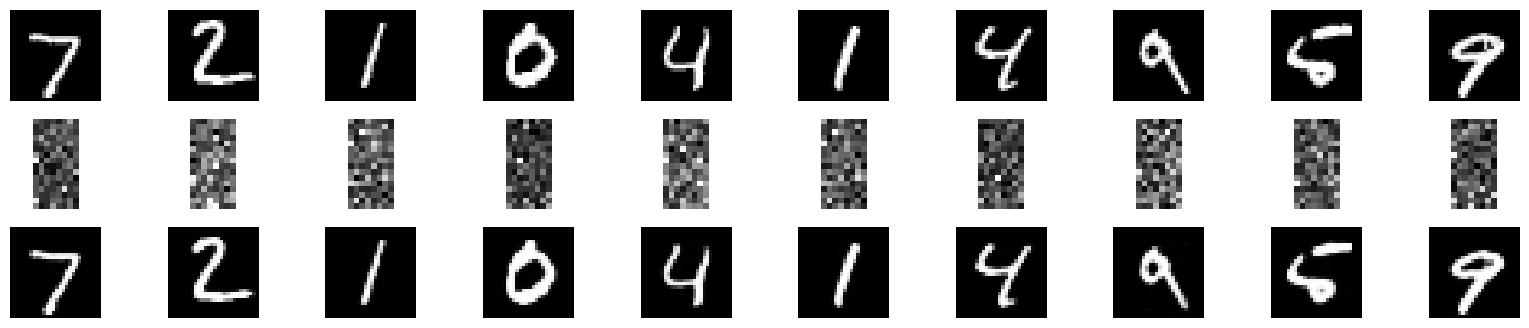

In [111]:
QTD_IMGS = 10

plt.figure(figsize=(20, 4))

for i in range(QTD_IMGS):
  # Original images
  plt.subplot(3, QTD_IMGS, i + 1)
  plt.imshow(x_test[i], cmap='gray')
  plt.axis('off')
  
  # Encoded images
  plt.subplot(3, QTD_IMGS, i + QTD_IMGS + 1)
  plt.imshow(imgs_encoded[i].reshape(16, 8), cmap='gray')
  plt.axis('off')
  
  # Reconstructed images
  plt.subplot(3, QTD_IMGS, i + 2 * QTD_IMGS + 1)
  plt.imshow(img_pred[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  
plt.show()